# PURPOSE: To Investigate the causes of cancer and further research the effectiveness of Cancer prediction methodologies for males and females.

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics,tree,model_selection
from sklearn.metrics import ConfusionMatrixDisplay
sns.set_theme(color_codes=True, style='darkgrid', palette='deep', font='sans-serif')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
data = pd.read_csv("survey lung cancer.csv")
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [82]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [83]:
p1_sex1 = data['GENDER'].value_counts()
p1_sex2 = pd.crosstab(data['GENDER'],data['LUNG_CANCER'])
p1_sex2

LUNG_CANCER,NO,YES
GENDER,,
F,22,125
M,17,145


In [84]:
print("KEY: 1 = NO, 2 = YES")
print("KEY: 0 = FEMALE, 1 = MALE")
pd.crosstab(data['LUNG_CANCER'],data['SMOKING'])

KEY: 1 = NO, 2 = YES
KEY: 0 = FEMALE, 1 = MALE


SMOKING,1,2
LUNG_CANCER,,
NO,20,19
YES,115,155


In [85]:
data.corr()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
AGE,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104
SMOKING,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117
YELLOW_FINGERS,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829
ANXIETY,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634
PEER_PRESSURE,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828
CHRONIC DISEASE,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938
FATIGUE,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832
ALLERGY,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433
WHEEZING,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640
ALCOHOL CONSUMING,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226


<AxesSubplot:title={'center':'AGE'}, xlabel='[LUNG_CANCER]'>

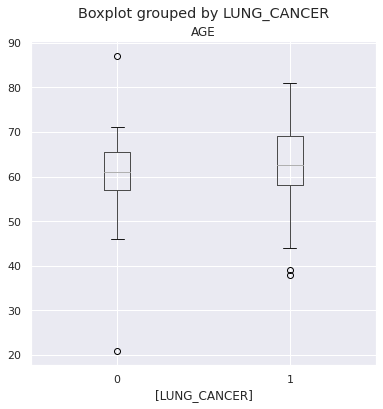

In [93]:
Data = data[['LUNG_CANCER','AGE']]
Data.boxplot(by = 'LUNG_CANCER',figsize = (6,6))

In [86]:
print("KEY: 1 = NO, 2 = YES")
print("KEY: 0 = FEMALE, 1 = MALE")
data = data.replace({'M':0,'F':1})
data = data.replace({'YES':1,'NO':0})
data

KEY: 1 = NO, 2 = YES
KEY: 0 = FEMALE, 1 = MALE


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,0,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,0,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,0,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


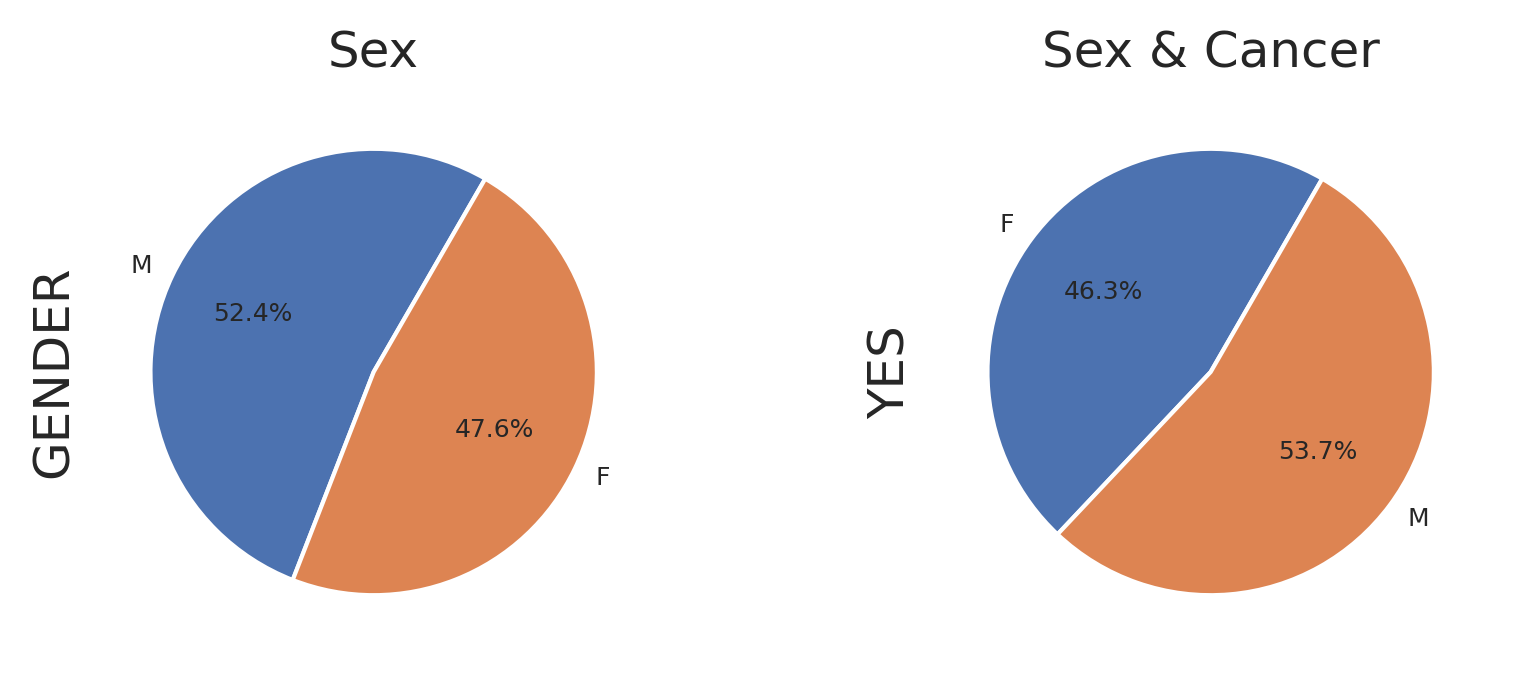

In [87]:
fig1 = plt.figure(figsize = (6,12),dpi = 300) 
plt.subplots_adjust(wspace = 0.5)
ax1_sex1 = fig1.add_subplot(1,2,1)
ax1_sex2= fig1.add_subplot(1,2,2)
p1_sex1.plot(kind = 'pie',title = 'Sex',fontsize =6,autopct = '%1.1f%%',ax = ax1_sex1,startangle = 60)
p1_sex2.iloc[:,1].plot(kind = 'pie',title = 'Sex & Cancer',fontsize =6,autopct = '%1.1f%%',ax = ax1_sex2,startangle = 60)
plt.show()

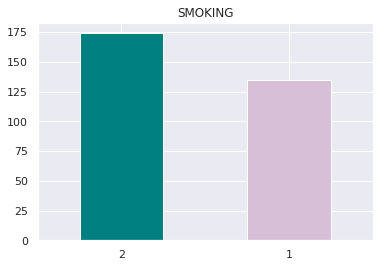

In [65]:
colors = ['teal','thistle']
data['SMOKING'].value_counts().plot(kind = 'bar',rot = 0,color = colors)
plt.title('SMOKING')
plt.show()

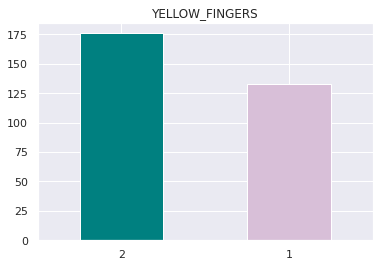

In [66]:
data['YELLOW_FINGERS'].value_counts().plot(kind = 'bar',rot = 0,color = colors)
plt.title('YELLOW_FINGERS')
plt.show()

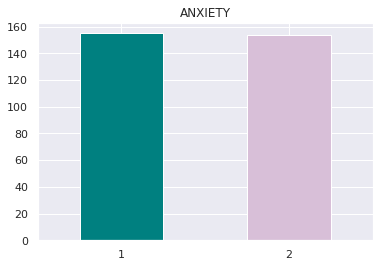

In [67]:
data['ANXIETY'].value_counts().plot(kind = 'bar',rot = 0,color = colors)
plt.title('ANXIETY')
plt.show()

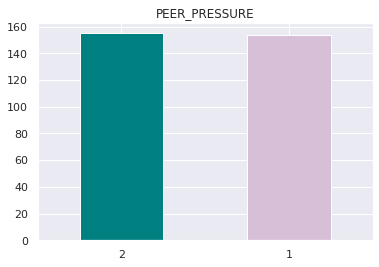

In [68]:
data['PEER_PRESSURE'].value_counts().plot(kind = 'bar',rot = 0,color = colors)
plt.title('PEER_PRESSURE')
plt.show()

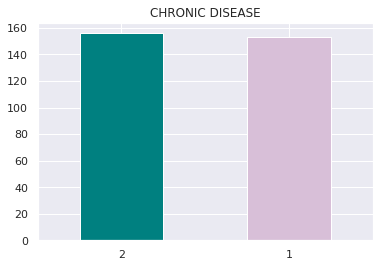

In [69]:
data['CHRONIC DISEASE'].value_counts().plot(kind = 'bar',rot = 0,color = colors)
plt.title('CHRONIC DISEASE')
plt.show()

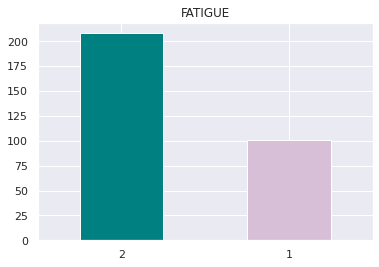

In [70]:
data['FATIGUE '].value_counts().plot(kind = 'bar',rot = 0,color = colors)
plt.title('FATIGUE')
plt.show()

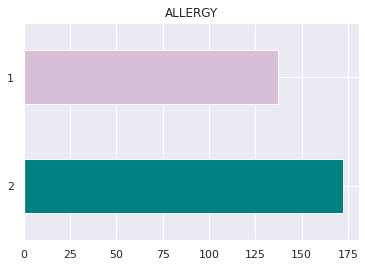

In [71]:
data['ALLERGY '].value_counts().plot(kind = 'barh',rot = 0,color = colors)
plt.title('ALLERGY')
plt.show()

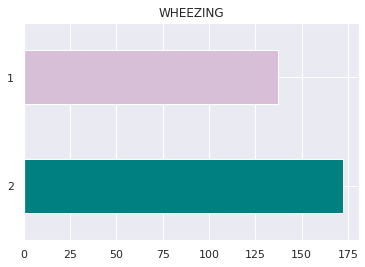

In [72]:
data['WHEEZING'].value_counts().plot(kind = 'barh',rot = 0,color = colors)
plt.title('WHEEZING')
plt.show()

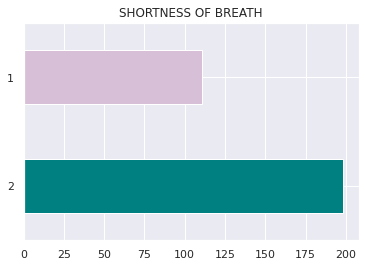

In [73]:
data['SHORTNESS OF BREATH'].value_counts().plot(kind = 'barh',rot = 0,color = colors)
plt.title('SHORTNESS OF BREATH')
plt.show()

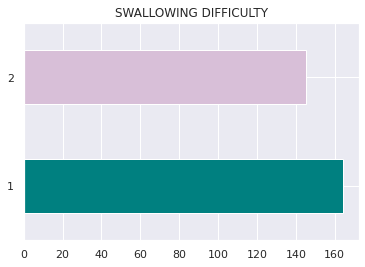

In [74]:
data['SWALLOWING DIFFICULTY'].value_counts().plot(kind = 'barh',rot = 0,color = colors)
plt.title('SWALLOWING DIFFICULTY')
plt.show()

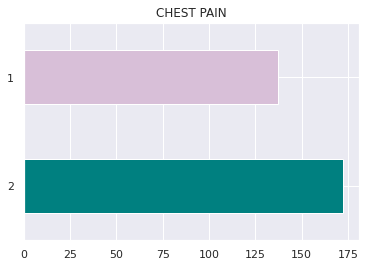

In [75]:
data['CHEST PAIN'].value_counts().plot(kind = 'barh',rot = 0,color = colors)
plt.title('CHEST PAIN')
plt.show()

In [95]:
data = data.replace({'M':0,'F':1})
data = data.replace({'YES':1,'NO':2})
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,0,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,0,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,0,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


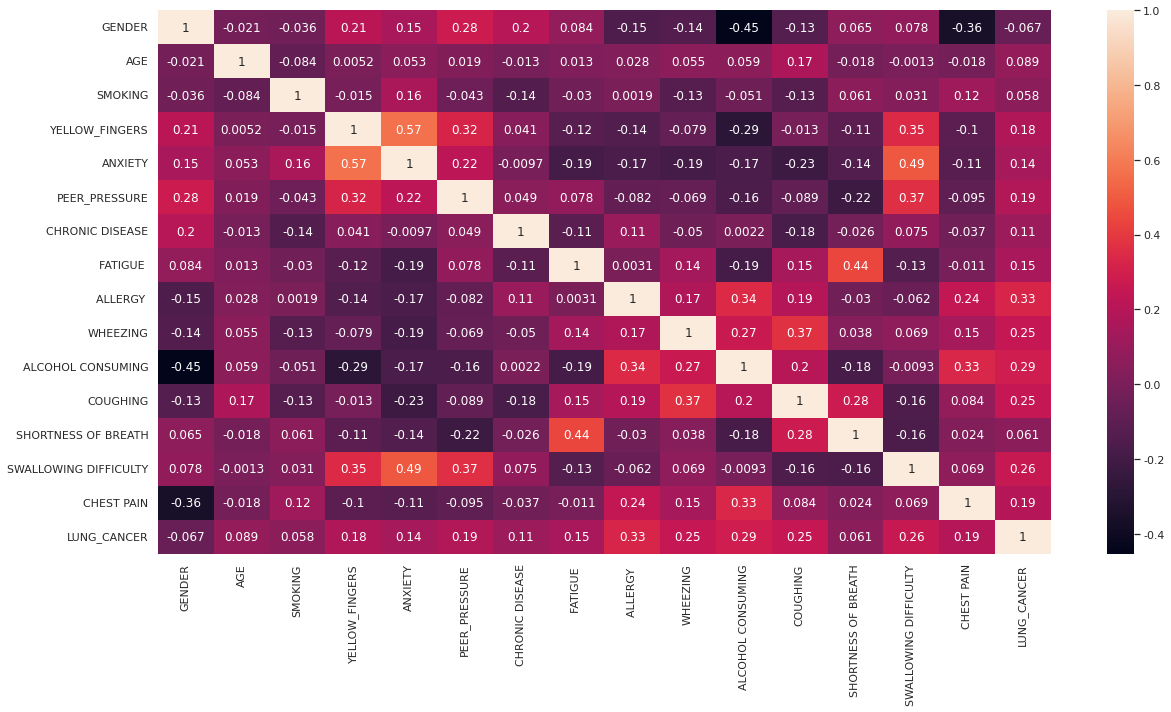

In [96]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True);